In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda



##Fashion-MNIST Dataset

The dataset consists of handwritten digits. Fashion-MNIST comprises 70,000 grayscale images, each sized at 28x28 pixels.

These images are categorized into ten different classes, including items like T-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.

The dataset is split into a training set with 60,000 images and a test set with 10,000 images.

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [3]:
X_ex, y_ex = next(iter(train_dataloader))
print(y_ex)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])


torch.Size([1, 28, 28])


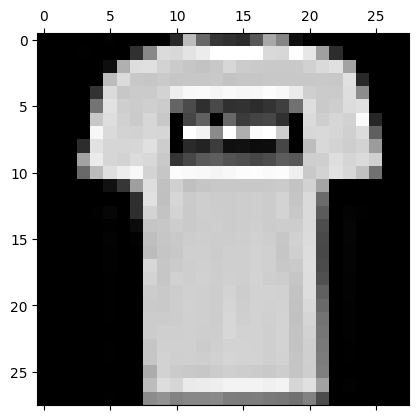

In [7]:
import matplotlib.pyplot as plt
print(X_ex[0].shape)
plt.matshow(X_ex[1][0],cmap='gray')
plt.show()

In [9]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [10]:
model = MLP()
for name, p in model.named_parameters():
  print(name, p.size())

linear_relu_stack.0.weight torch.Size([512, 784])
linear_relu_stack.0.bias torch.Size([512])
linear_relu_stack.2.weight torch.Size([512, 512])
linear_relu_stack.2.bias torch.Size([512])
linear_relu_stack.4.weight torch.Size([10, 512])
linear_relu_stack.4.bias torch.Size([10])


In [11]:
for name, p in model.named_parameters():
  print(name, p.shape)

linear_relu_stack.0.weight torch.Size([512, 784])
linear_relu_stack.0.bias torch.Size([512])
linear_relu_stack.2.weight torch.Size([512, 512])
linear_relu_stack.2.bias torch.Size([512])
linear_relu_stack.4.weight torch.Size([10, 512])
linear_relu_stack.4.bias torch.Size([10])


In [12]:
params = list(model.named_parameters())
print(params[0])
print(params[0][0])
print(params[0][1].data)

('linear_relu_stack.0.weight', Parameter containing:
tensor([[ 0.0251, -0.0205,  0.0289,  ..., -0.0242,  0.0071, -0.0227],
        [ 0.0260, -0.0136, -0.0234,  ..., -0.0093, -0.0301, -0.0224],
        [ 0.0064, -0.0115,  0.0202,  ...,  0.0062, -0.0128,  0.0319],
        ...,
        [-0.0196,  0.0008, -0.0244,  ..., -0.0298, -0.0119,  0.0223],
        [-0.0117,  0.0339, -0.0258,  ...,  0.0069,  0.0035,  0.0116],
        [ 0.0034, -0.0046, -0.0093,  ...,  0.0195, -0.0230,  0.0277]],
       requires_grad=True))
linear_relu_stack.0.weight
tensor([[ 0.0251, -0.0205,  0.0289,  ..., -0.0242,  0.0071, -0.0227],
        [ 0.0260, -0.0136, -0.0234,  ..., -0.0093, -0.0301, -0.0224],
        [ 0.0064, -0.0115,  0.0202,  ...,  0.0062, -0.0128,  0.0319],
        ...,
        [-0.0196,  0.0008, -0.0244,  ..., -0.0298, -0.0119,  0.0223],
        [-0.0117,  0.0339, -0.0258,  ...,  0.0069,  0.0035,  0.0116],
        [ 0.0034, -0.0046, -0.0093,  ...,  0.0195, -0.0230,  0.0277]])


In [13]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 100 == 0:
        #     loss, current = loss.item(), batch * len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
model = MLP()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999))

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1

Test: 
 Accuracy: 84.8%, Avg loss: 0.419393 

Epoch 2

Test: 
 Accuracy: 85.5%, Avg loss: 0.391480 

Epoch 3

Test: 
 Accuracy: 85.4%, Avg loss: 0.388997 

Epoch 4

Test: 
 Accuracy: 85.9%, Avg loss: 0.382323 

Epoch 5

Test: 
 Accuracy: 87.3%, Avg loss: 0.355870 

Epoch 6

Test: 
 Accuracy: 87.4%, Avg loss: 0.364070 

Epoch 7

Test: 
 Accuracy: 87.4%, Avg loss: 0.355281 

Epoch 8

Test: 
 Accuracy: 87.9%, Avg loss: 0.346048 

Epoch 9

Test: 
 Accuracy: 88.0%, Avg loss: 0.355901 

Epoch 10

Test: 
 Accuracy: 87.9%, Avg loss: 0.373891 

Done!


##CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [22]:
import torchvision

transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomPerspective(),
    torchvision.transforms.ToTensor()
])
train_dataset = torchvision.datasets.CIFAR10(root="data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root="data", train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [24]:
X_ex, y_ex = next(iter(train_dataloader))
y_ex

tensor([3, 9, 8, 8, 5, 7, 5, 0, 1, 1, 8, 6, 7, 4, 6, 6, 4, 3, 2, 8, 6, 0, 2, 6,
        2, 8, 2, 8, 5, 5, 0, 6])

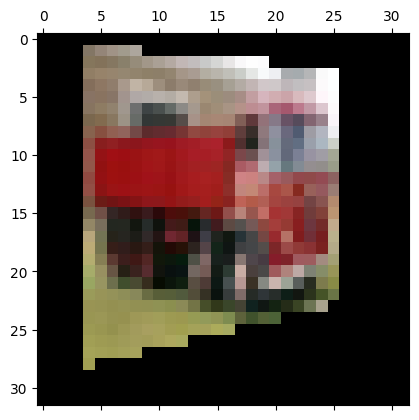

In [25]:
plt.matshow(X_ex[1].permute(1,2,0))
plt.show()

In [26]:
import torch.nn.functional as F
class LeNet(nn.Module):
    def __init__(self,num_classes=0):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc_1 = nn.Linear(16*5*5,120)
        self.fc_2 = nn.Linear(120,84)
        self.fc_3 = nn.Linear(84,num_classes)

    def forward(self,x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out,2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out,2)
        out = out.view(out.size(0),-1)
        out = F.relu(self.fc_1(out))
        out = F.relu(self.fc_2(out))
        out = self.fc_3(out)
        return out

def lenet(num_classes):
    return LeNet(num_classes=num_classes)

In [27]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X = X
        y = y
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 100 == 0:
        #     loss, current = loss.item(), batch * len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X
            y = y
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [28]:
model = lenet(10)
model = model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999))

epochs = 10 #Maybe larger
for t in range(epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer)
    if epochs % 10 == 0:
      print(f"Epoch {t+1}\n")
      test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1

Test Error: 
 Accuracy: 41.5%, Avg loss: 1.615127 

Epoch 2

Test Error: 
 Accuracy: 44.9%, Avg loss: 1.516402 

Epoch 3

Test Error: 
 Accuracy: 47.1%, Avg loss: 1.457359 

Epoch 4

Test Error: 
 Accuracy: 49.6%, Avg loss: 1.398467 

Epoch 5

Test Error: 
 Accuracy: 50.7%, Avg loss: 1.372015 

Epoch 6

Test Error: 
 Accuracy: 52.5%, Avg loss: 1.316328 

Epoch 7

Test Error: 
 Accuracy: 53.7%, Avg loss: 1.302731 

Epoch 8

Test Error: 
 Accuracy: 53.0%, Avg loss: 1.321123 

Epoch 9

Test Error: 
 Accuracy: 55.0%, Avg loss: 1.263392 

Epoch 10

Test Error: 
 Accuracy: 54.1%, Avg loss: 1.301965 

Done!
